Optimal weekly number of soldiers to produce: 20
Optimal weekly number of trains to produce: 60


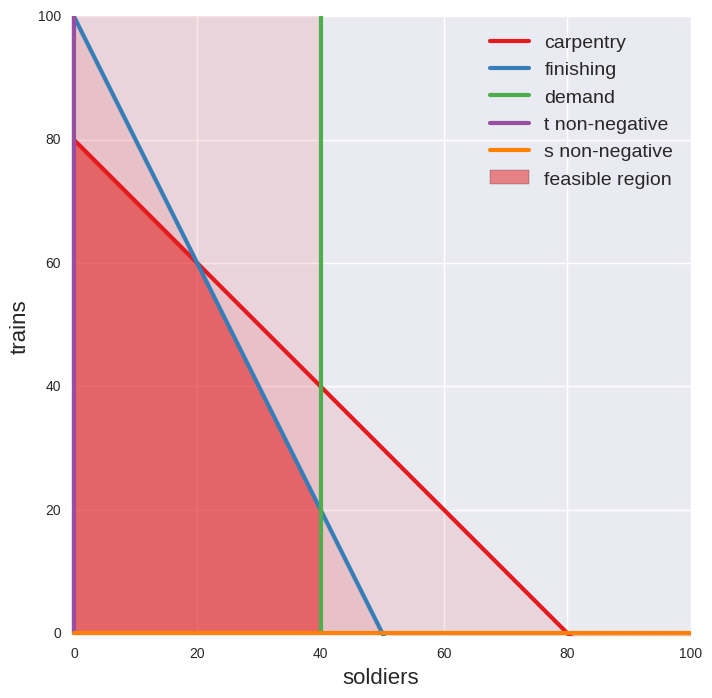

In [1]:
import numpy as np
import pulp

# create the LP object, set up as a maximization problem
prob = pulp.LpProblem('Giapetto', pulp.LpMaximize)

# set up decision variables
soldiers = pulp.LpVariable('soldiers', lowBound=0, cat='Integer')
trains = pulp.LpVariable('trains', lowBound=0, cat='Integer')



# model weekly production costs
raw_material_costs = 10 * soldiers + 9 * trains
variable_costs = 14 * soldiers + 10 * trains

# model weekly revenues from toy sales
revenues = 27 * soldiers + 21 * trains

# use weekly profit as the objective function to maximize
profit = revenues - (raw_material_costs + variable_costs)
prob += profit  # here's where we actually add it to the obj function

# add constraints for available labor hours
carpentry_hours = soldiers + trains
prob += (carpentry_hours <= 80)

finishing_hours = 2*soldiers + trains
prob += (finishing_hours <= 100)

# add constraint representing demand for soldiers
prob += (soldiers <= 40)

# solve the LP using the default solver
optimization_result = prob.solve()

# make sure we got an optimal solution
assert optimization_result == pulp.LpStatusOptimal

# display the results
for var in (soldiers, trains):
    print('Optimal weekly number of {} to produce: {:1.0f}'.format(var.name, var.value()))

from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# use seaborn to change the default graphics to something nicer
# and set a nice color palette
import seaborn as sns
sns.set_palette('Set1')

# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
s = np.linspace(0, 100)

# add carpentry constraint: trains <= 80 - soldiers
plt.plot(s, 80 - s, lw=3, label='carpentry')
plt.fill_between(s, 0, 80 - s, alpha=0.1)

# add finishing constraint: trains <= 100 - 2*soldiers
plt.plot(s, 100 - 2 * s, lw=3, label='finishing')
plt.fill_between(s, 0, 100 - 2 * s, alpha=0.1)

# add demains constraint: soldiers <= 40
plt.plot(40 * np.ones_like(s), s, lw=3, label='demand')
plt.fill_betweenx(s, 0, 40, alpha=0.1)

# add non-negativity constraints
plt.plot(np.zeros_like(s), s, lw=3, label='t non-negative')
plt.plot(s, np.zeros_like(s), lw=3, label='s non-negative')

# highlight the feasible region
path = Path([
    (0., 0.),
    (0., 80.),
    (20., 60.),
    (40., 20.),
    (40., 0.),
    (0., 0.),
])
patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('soldiers', fontsize=16)
plt.ylabel('trains', fontsize=16)
plt.xlim(-0.5, 100)
plt.ylim(-0.5, 100)
plt.legend(fontsize=14)
plt.show()